In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)


60000

In [4]:
len(x_test)


10000

In [5]:
len(y_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

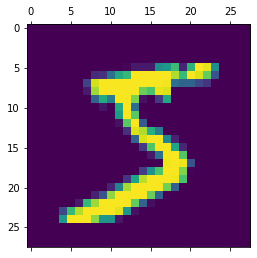

In [12]:
plt.matshow(x_train[0])


In [13]:
x_train = x_train / 255
x_test = x_test / 255


In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6550 - accuracy: 0.8343 - val_loss: 0.3612 - val_accuracy: 0.9016
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3407 - accuracy: 0.9047 - val_loss: 0.2972 - val_accuracy: 0.9181
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.9178 - val_loss: 0.2652 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9262 - val_loss: 0.2427 - val_accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2386 - accuracy: 0.9337 - val_loss: 0.2229 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2197 - accuracy: 0.9384 - val_loss: 0.2077 - val_accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2037 - accuracy: 0.9430 - val_loss: 0.1927 - val_accuracy:

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.9539
Loss=0.164
Accuracy=0.954


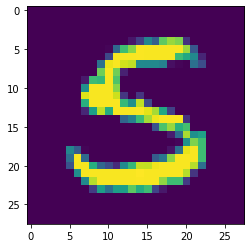

In [20]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [21]:
predicted_value=model.predict(x_test)
print("Handwritten Number Is = %d" %np.argmax(predicted_value[n]))

Handwritten Number Is = 5


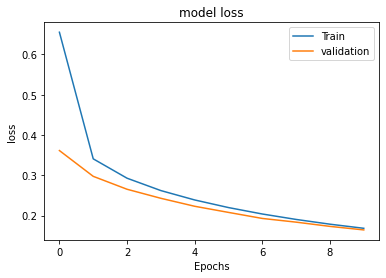

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

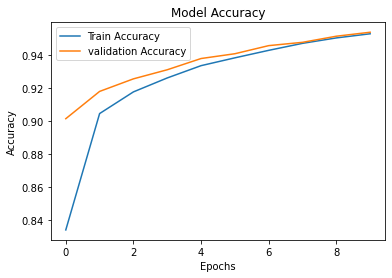

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'validation Accuracy'])
plt.show()